In [18]:
import pandas as pd
import matplotlib.pyplot as plt


# Task 0
Data extraction: get the data from 3 tables & combine it into single `.csv` file.
After that read this file using pandas to create Dataframe.
So it will be all joined data in 1 dataframe. Quick check - should be 74818 rows in it.

In [14]:
# write your code here
import sqlite3

conn = sqlite3.connect('../db.sqlite3')

table1 = pd.read_sql_query('SELECT * FROM restaurant_order', conn) 
table2 = pd.read_sql_query('SELECT * FROM restaurant_orderitem', conn)
table3 = pd.read_sql_query('SELECT * FROM restaurant_product', conn)

conn.close()

combined_df = pd.merge(table2, table1, left_on='order_id', right_on='id', suffixes=('_orderitem', '_order'))
combined_df = pd.merge(combined_df, table3, left_on='product_id', right_on='id', suffixes=('', '_product'))

combined_df.to_csv('combined_data.csv', index=False)
df = pd.read_csv('combined_data.csv')
df.shape[0]

74818

# Task 1
Get Top 10 most popular products in restaurant sold by Quantity.
Count how many times each product was sold and create a pie chart with percentage of popularity (by quantity) for top 10 of them.

Example:

![pie chart](../demo/pie.png)

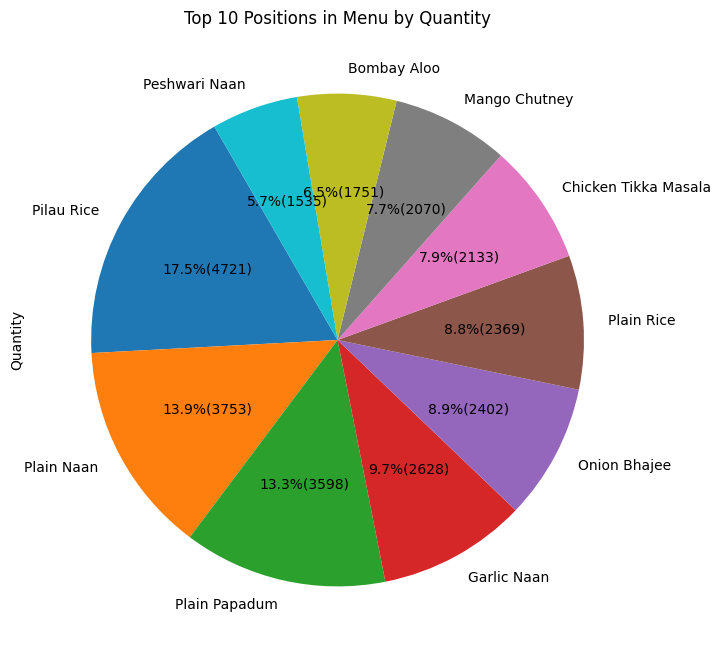

In [23]:
# write your code here
top_products = df["name"].value_counts().head(10)

def func(x, allvals):
    absolute = int(x / 100.*sum(allvals))
    return f'{x:.1f}%({absolute})'

plt.figure(figsize=(10, 8))
plt.pie(top_products, labels=top_products.index, autopct=lambda x: func(x, top_products), startangle=120)
plt.title("Top 10 Positions in Menu by Quantity")
plt.ylabel("Quantity")
plt.show()

# Task 2
Calculate `Item Price` (Product Price * Quantity) for each Order Item in dataframe.
And Make the same Top 10 pie chart, but this time by `Item Price`. So this chart should describe not the most popular products by quantity, but which products (top 10) make the most money for restaurant. It should be also with percentage.

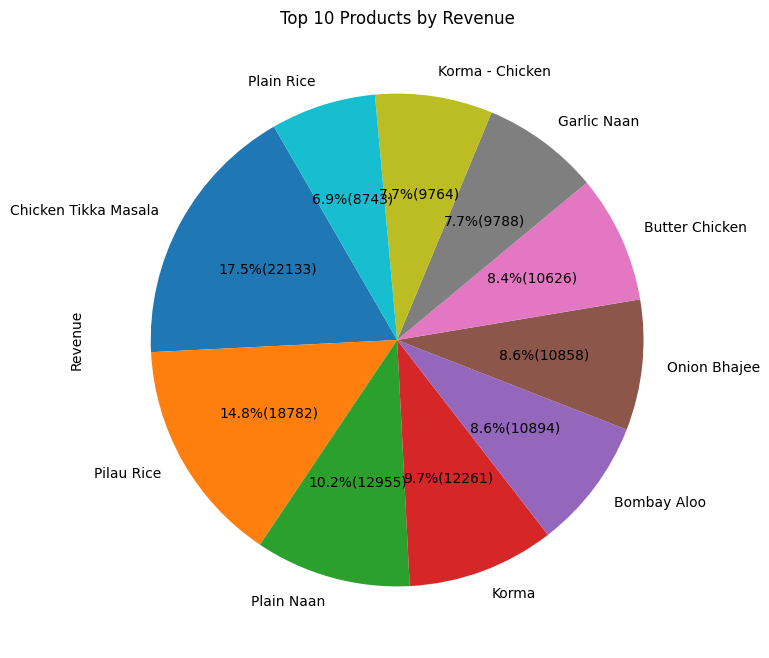

In [28]:
# write your code here
df["Item Price"] = df["price"] * df["quantity"]

product_revenue = df.groupby("name")["Item Price"].sum()
top_products_revenue = product_revenue.nlargest(10)

def func(x, allvals):
    absolute = int(x / 100.*sum(allvals))
    return f'{x:.1f}%({absolute})'

plt.figure(figsize=(10, 8))
plt.pie(top_products_revenue, labels=top_products_revenue.index, autopct=lambda x: func(x, top_products_revenue), startangle=120)
plt.title("Top 10 Products by Revenue")
plt.ylabel("Revenue")
plt.show()

# Task 3
Calculate `Order Hour` based on `Order Datetime`, which will tell about the specific our the order was created (from 0 to 23). Using `Order Hour` create a bar chart, which will tell the total restaurant income based on the hour order was created. So on x-axis - it will be values from 0 to 23 (hours), on y-axis - it will be the total sum of order prices, which were sold on that hour.

Example:

![bar chart](../demo/bar.png)

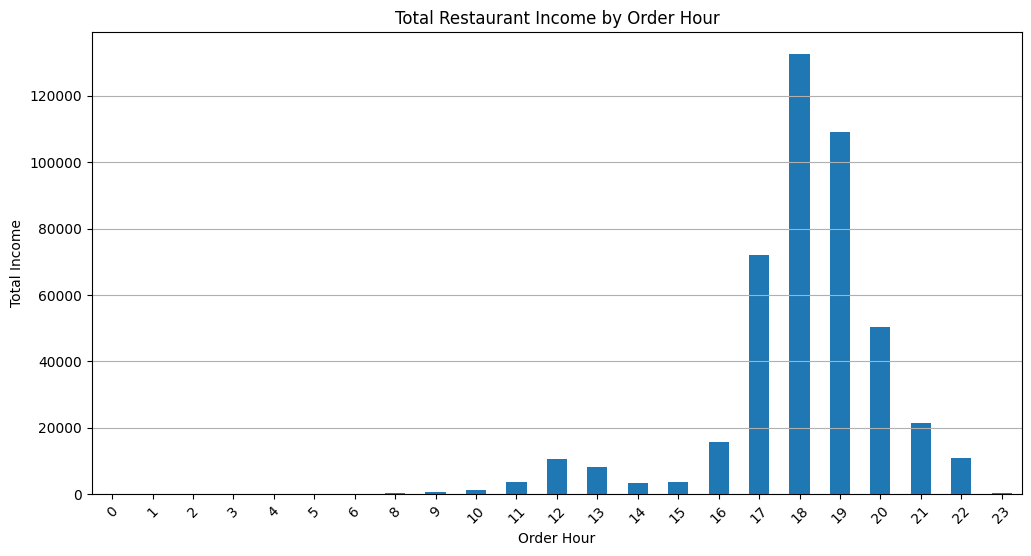

In [30]:
# write your code here
df["datetime"] = pd.to_datetime(df["datetime"])
df["Order Hour"] = df["datetime"].dt.hour
df["Item Price"] = df["price"] * df["quantity"]
income_by_hour = df.groupby("Order Hour")["Item Price"].sum()
    
plt.figure(figsize=(12, 6))
income_by_hour.plot(kind="bar")
plt.title("Total Restaurant Income by Order Hour")
plt.xlabel("Order Hour")
plt.ylabel("Total Income")
plt.xticks(rotation=45)
plt.grid(axis="y")
plt.show()

# Task 4
Make similar bar chart, but right now with `Order Day Of The Week` (from Monday to Sunday), and also analyze total restaurant income by each day of the week.

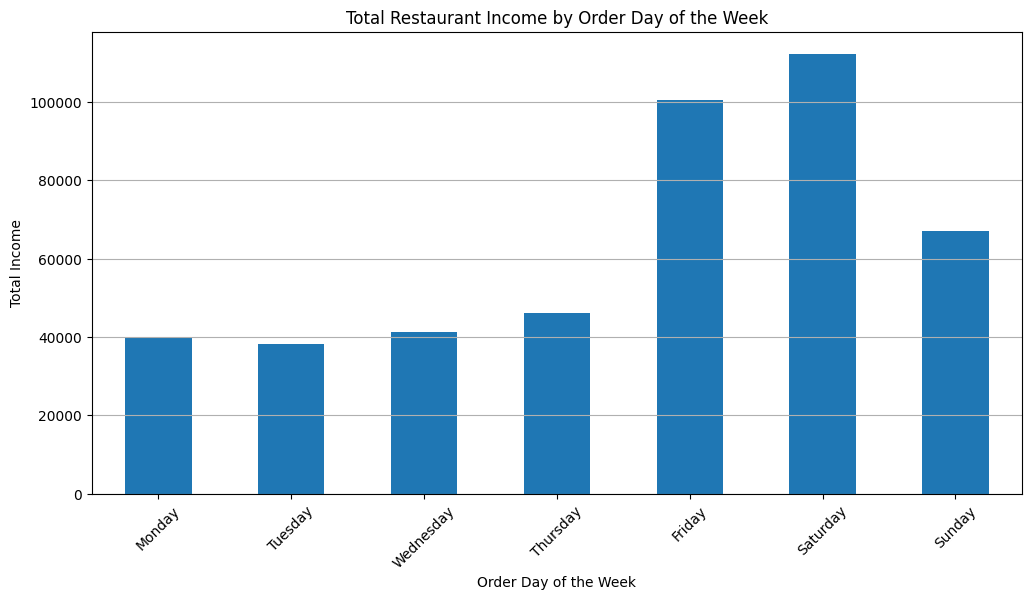

In [31]:
# write your code here
df["datetime"] = pd.to_datetime(df["datetime"])
df["Order Day of the Week"] = df["datetime"].dt.day_name()
df["Item Price"] = df["price"] * df["quantity"]

income_by_day = df.groupby("Order Day of the Week")["Item Price"].sum()

ordered_days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
income_by_day = income_by_day.reindex(ordered_days)

plt.figure(figsize=(12, 6))
income_by_day.plot(kind="bar")
plt.title("Total Restaurant Income by Order Day of the Week")
plt.xlabel("Order Day of the Week")
plt.ylabel("Total Income")
plt.xticks(rotation=45)
plt.grid(axis="y")
plt.show()